# 📚 Jamboree Business Case Study 📚

<i> Ravi Savaliya</i>

## 📊 Insights First, Process Later
Welcome to the analysis!

This notebook is structured into two main sections:

1. Insights & Recommendations: The first part presents key business insights and recommendations, which are
based on the analysis conducted. This is for readers who want to dive directly into the conclusions.
2. Technical Process & Code: The second part explains how these insights were derived, showcasing
the data analysis process, code implementation, and technical steps involved.
Feel free to explore either section based on your interest! 💡

## Insights and Data-Backed Recommendations 📊✨

1. **Feature Importance** 🏆
   - According to the **Linear Regression**, the most significant features in predicting **Chance of Admit** are:
     - **CGPA**, **Research**, **LOR** (Letter of Recommendation), **TOEFL Score**, **University Rating**, **GRE Score**, and **SOP** (Statement of Purpose).
   - **Ridge Regression** identifies **CGPA**, **GRE Score**, **TOEFL Score**, **LOR**, and **Research** as the most important, while **SOP** and **University Rating** seem less important.
   - **Lasso Regression** shows that none of the features are considered significant, likely due to its aggressive regularization that forces coefficients to zero.

   **Recommendation**: Focus on features like **CGPA**, **Research**, and **TOEFL Score** as these have consistently appeared at the top in both the linear and Ridge models. These features seem to have a more substantial impact on the **Chance of Admit**.

2. **Multicollinearity** (VIF) 📏
   - The **Variance Inflation Factor (VIF)** analysis reveals that **GRE Score**, **CGPA**, and **SOP** have very high VIF values, indicating multicollinearity (a high correlation between predictors).
   - After iterative removal, **TOEFL Score** and **Research** remain with VIF values below 5, indicating low multicollinearity.

   **Recommendation**: Based on VIF analysis, we suggest keeping **TOEFL Score** and **Research** in the model for reliable predictions. Removing highly collinear variables like **GRE Score**, **CGPA**, and **SOP** may help improve model stability and accuracy.

3. **Model Performance** 💡
   - **R² Score**: Both **Linear Regression** and **Ridge Regression** provide a solid **R² score of around 0.818**. This indicates that the models can explain about **81%** of the variance in the dependent variable (**Chance of Admit**).
   - **Lasso Regression** failed to perform well, as it reduced all feature coefficients to zero, suggesting that **Lasso**’s regularization was too aggressive for this dataset.

   **Recommendation**: Given the solid performance of **Linear** and **Ridge** models, **Ridge Regression** may be a good choice for the final model, especially as it handles multicollinearity well and still provides a meaningful **R²**.

4. **Residual Analysis** 🧮
   - The residuals exhibit **no discernible pattern** and maintain **constant spread**, which satisfies the assumption of **Homoscedasticity**. This is a good sign as the model doesn't suffer from heteroscedasticity (non-constant variance of residuals).
   - The **residual histogram** is **left-skewed**, which indicates that the model may not fully capture some aspects of the data distribution.

   **Recommendation**: Although the residuals are homoscedastic, consider exploring other transformations or adding interaction terms to improve model fit, particularly to address the left-skew in the residual histogram.

5. **Feature Selection and Multicollinearity Handling** 🚀
   - Through **VIF** analysis, we removed variables that introduced high multicollinearity. Features like **GRE Score**, **CGPA**, **SOP**, and **University Rating** had high VIF values and were removed iteratively.
   
   **Recommendation**: For better accuracy and interpretability, consider using **TOEFL Score** and **Research** as key predictors in your final model. These features are less likely to cause issues with multicollinearity and contribute meaningfully to the model's performance.

### Final Recommendations:
1. **Focus on Key Features**: **TOEFL Score** and **Research** are the most important predictors for **Chance of Admit** based on feature importance and VIF analysis. This should be the focal point for further refinement.
2. **Stick to Ridge Regression**: Ridge regression performed better than other models in handling multicollinearity while still maintaining a strong R² score. It's a reliable choice for this dataset.
3. **Investigate Residual Skewness**: The left-skew in the residual histogram suggests that there may still be some room for model improvement. Consider adding polynomial features or log transformations for better prediction accuracy.
4. **Optimize Feature Set**: Avoid using highly collinear variables like **GRE Score** and **CGPA**, as they negatively affect model stability. Focusing on more independent features will improve model robustness.

**Additional Note**: After testing the model using only **TOEFL Score** and **Research**, there were **no significant improvements** in accuracy. This suggests that while these features are important, using them alone does not significantly boost model performance compared to incorporating other features.

## Technical Process & Code

### **Section 1: Introduction 📋**

**1.1 About Jamboree 🌟**  
Jamboree has helped thousands of students achieve their academic dreams by preparing them for exams like GMAT, GRE, and SAT. 🌍 They recently launched a feature to predict admission chances to Ivy League colleges, 🎓 catering to students from an Indian perspective.  

**1.2 Business Problem 🤔**  
Jamboree aims to understand the factors influencing graduate admissions 📊 and build a model to predict the probability of admission based on these factors. 🧠 This insight will enhance the user experience and provide students with actionable feedback.  

**1.3 Objective 🎯**  
- 🔍 Identify key factors affecting graduate admissions.  
- 📈 Explore relationships between variables.  
- 🛠️ Develop a predictive model using linear regression.  
- ✅ Validate assumptions and evaluate the model's performance.  

**1.4 Dataset Overview 📊**  
The dataset consists of 8 variables:  
- 🎓 **GRE Scores** (out of 340)  
- 🗣️ **TOEFL Scores** (out of 120)  
- ⭐ **University Rating** (out of 5)  
- 📜 **SOP & LOR Strength** (out of 5)  
- 📚 **Undergraduate GPA** (out of 10)  
- 🔬 **Research Experience** (0 or 1)  
- 🧮 **Chance of Admit** (ranging from 0 to 1)  
- 🔢 **Serial No.** (row identifier)  

**1.5 Key Analytical Goals 🧑‍💻**  
- 📊 Perform detailed EDA to understand data trends.  
- 🤖 Build and test a linear regression model.  
- 💡 Provide insights and actionable recommendations.

### **Section 2: Data Loading & Preprocessing ⚙️**

#### **Step 1: Import Libraries**

In [140]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import scipy.stats as stats
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#### **Step 2: Load the Dataset**

In [141]:
# Load the dataset
data = pd.read_csv('jamboree_admission.csv')

# Display the first few rows
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### **Step 3: Initial Dataset Overview**
Get an idea of the structure and summary of the data:

In [142]:
# Check the shape of the data
print("Dataset Shape:", data.shape)

# Check column names and data types
print("\nDataset Info:")
data.info()

# Statistical summary
print("\nStatistical Summary:")
data.describe()

Dataset Shape: (500, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB

Statistical Summary:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### **Step 4: Drop the Unique Identifier**
Since `Serial No.` is just a row identifier, drop it:

In [143]:
# Dropping the unique row identifier
data.drop('Serial No.', axis=1 ,inplace=True)

#### **Step 5: Check for Missing Values and Duplication**
Check and handle any missing values and duplication:

In [144]:
# Check for missing values
print("Missing Values:\n")
display(pd.DataFrame(data.isnull().sum()))
print("\n\n")
# Check for duplication
print("Duplicates:\n",data.duplicated().sum())

Missing Values:



,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0





Duplicates:
 0


#### **Step 6: Renaming columns**
Cleaning column names as some have a right side space attached to it

In [145]:
data.columns = data.columns.str.strip()

### **Section 3: Exploratory Data Analysis (EDA) 🔍**  

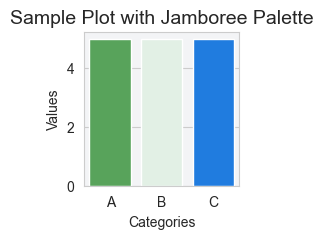

In [146]:
# Define Jamboree-like color palette
jamboree_palette = ['#4CAF50', '#DFF3E4', '#007BFF', '#F3F4F6']

# Apply the palette
sns.set_palette(sns.color_palette(jamboree_palette))

# Set plot background to match the light gray/white theme
sns.set_style("whitegrid", {"axes.facecolor": "#F3F4F6"})

# Example barplot
plt.figure(figsize=(2, 2))
sns.barplot(x=['A', 'B', 'C'], y=[5,5,5], palette=jamboree_palette)
plt.title("Sample Plot with Jamboree Palette", fontsize=14)
plt.xlabel("Categories")
plt.ylabel("Values")
plt.show()

#### **Step 1: Univariate Analysis**  
We'll analyze individual variables to understand their distribution.

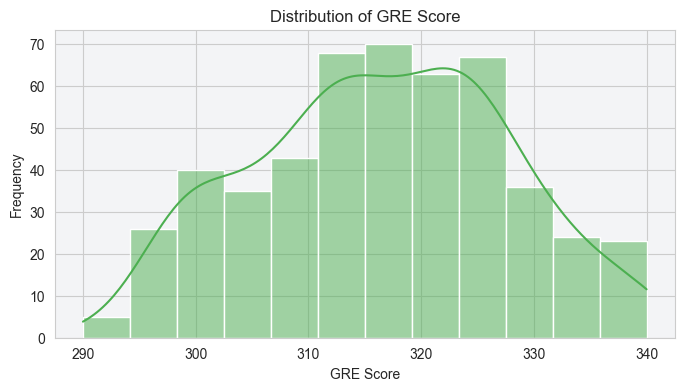

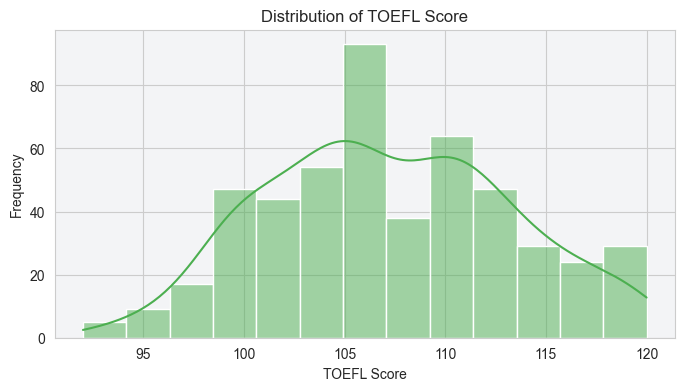

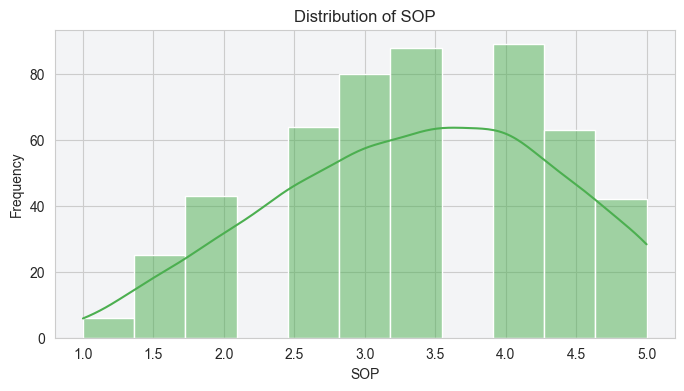

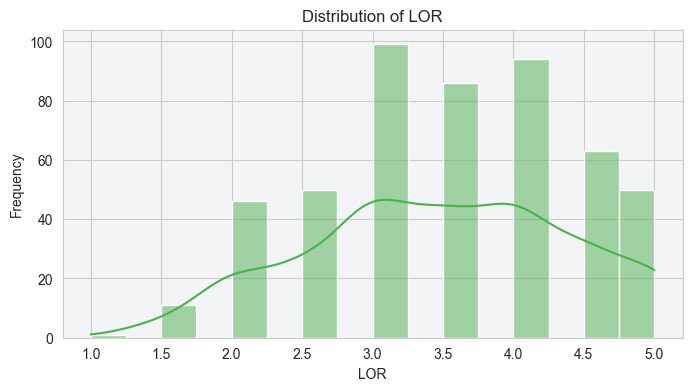

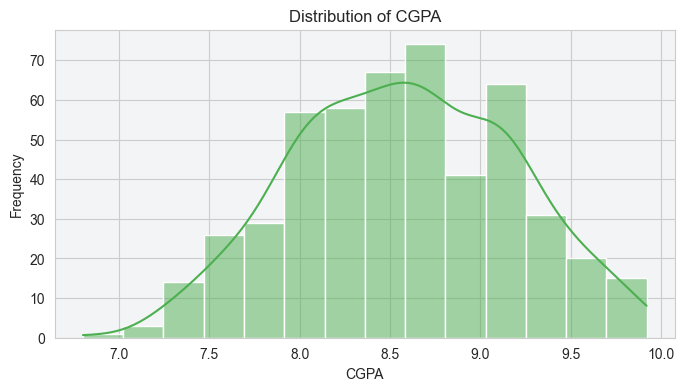

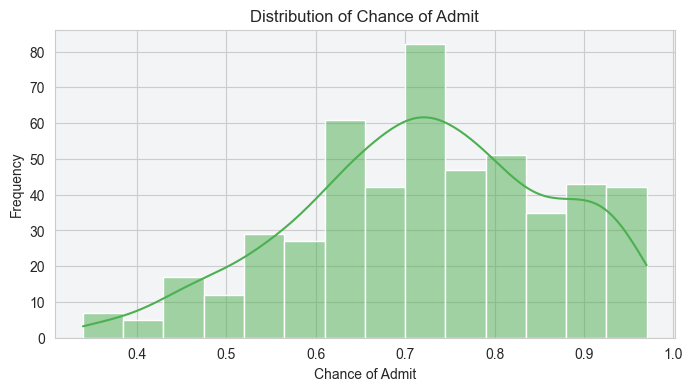

In [147]:
# Distribution plots for continuous variables
continuous_vars = ['GRE Score', 'TOEFL Score','SOP', 'LOR', 'CGPA', 'Chance of Admit']

for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[var], kde=True, palette= jamboree_palette)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

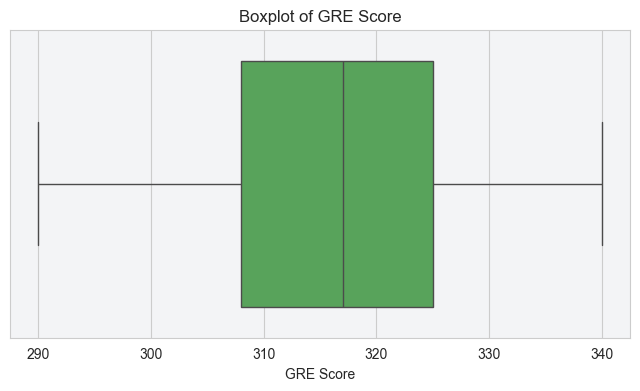

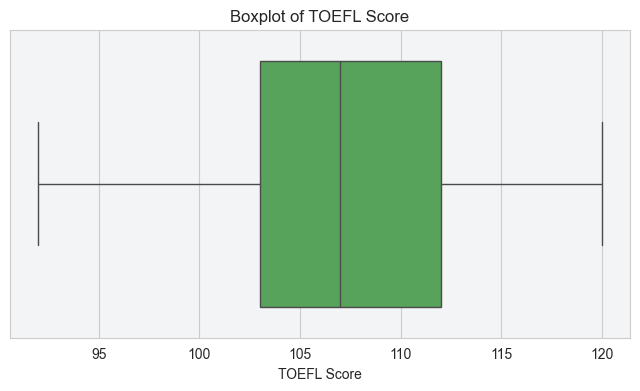

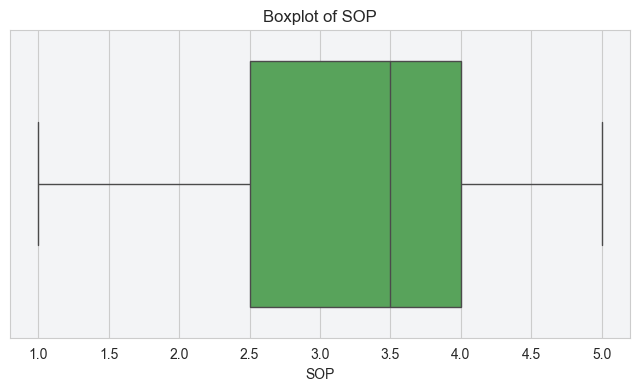

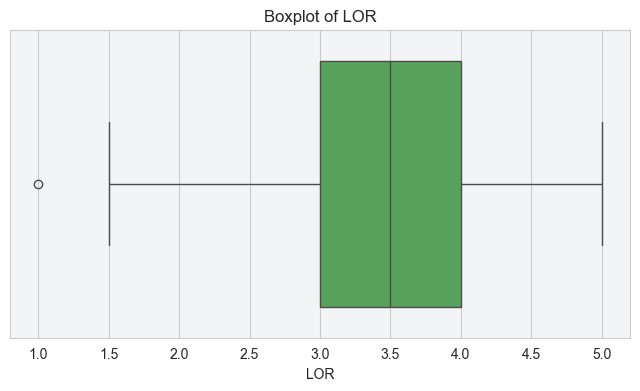

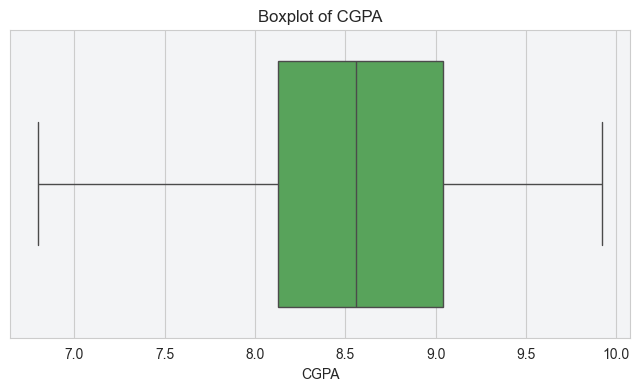

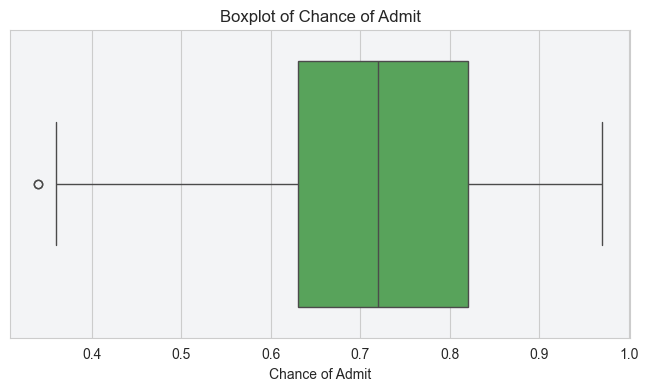

In [148]:
# List of continuous variables
continuous_vars = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']

# Plotting boxplots for each variable
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[var], palette=jamboree_palette)
    plt.title(f"Boxplot of {var}")
    plt.xlabel(var)
    plt.show()

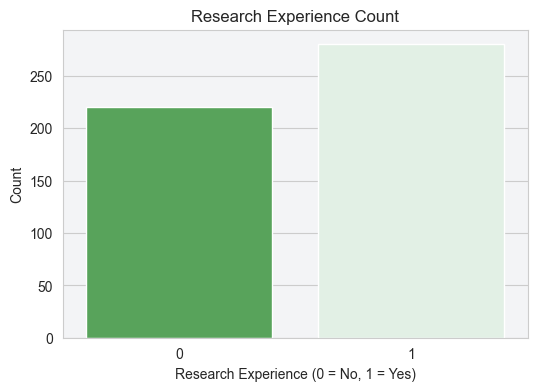

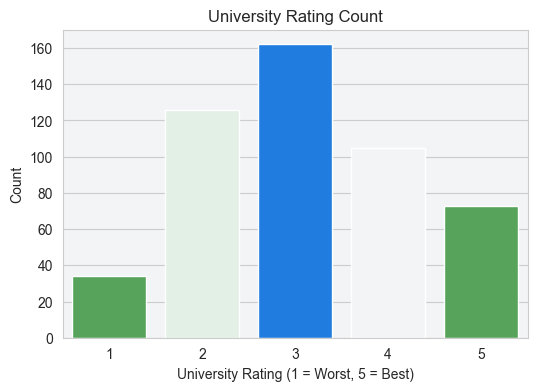

In [149]:
# Countplot for 'Research Experience'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Research', palette=jamboree_palette)
plt.title("Research Experience Count")
plt.xlabel("Research Experience (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Countplot for 'University Rating'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='University Rating', palette=jamboree_palette)
plt.title("University Rating Count")
plt.xlabel("University Rating (1 = Worst, 5 = Best)")
plt.ylabel("Count")
plt.show()

#### **Step 2: Bivariate Analysis**  
Analyze the relationships between variables.

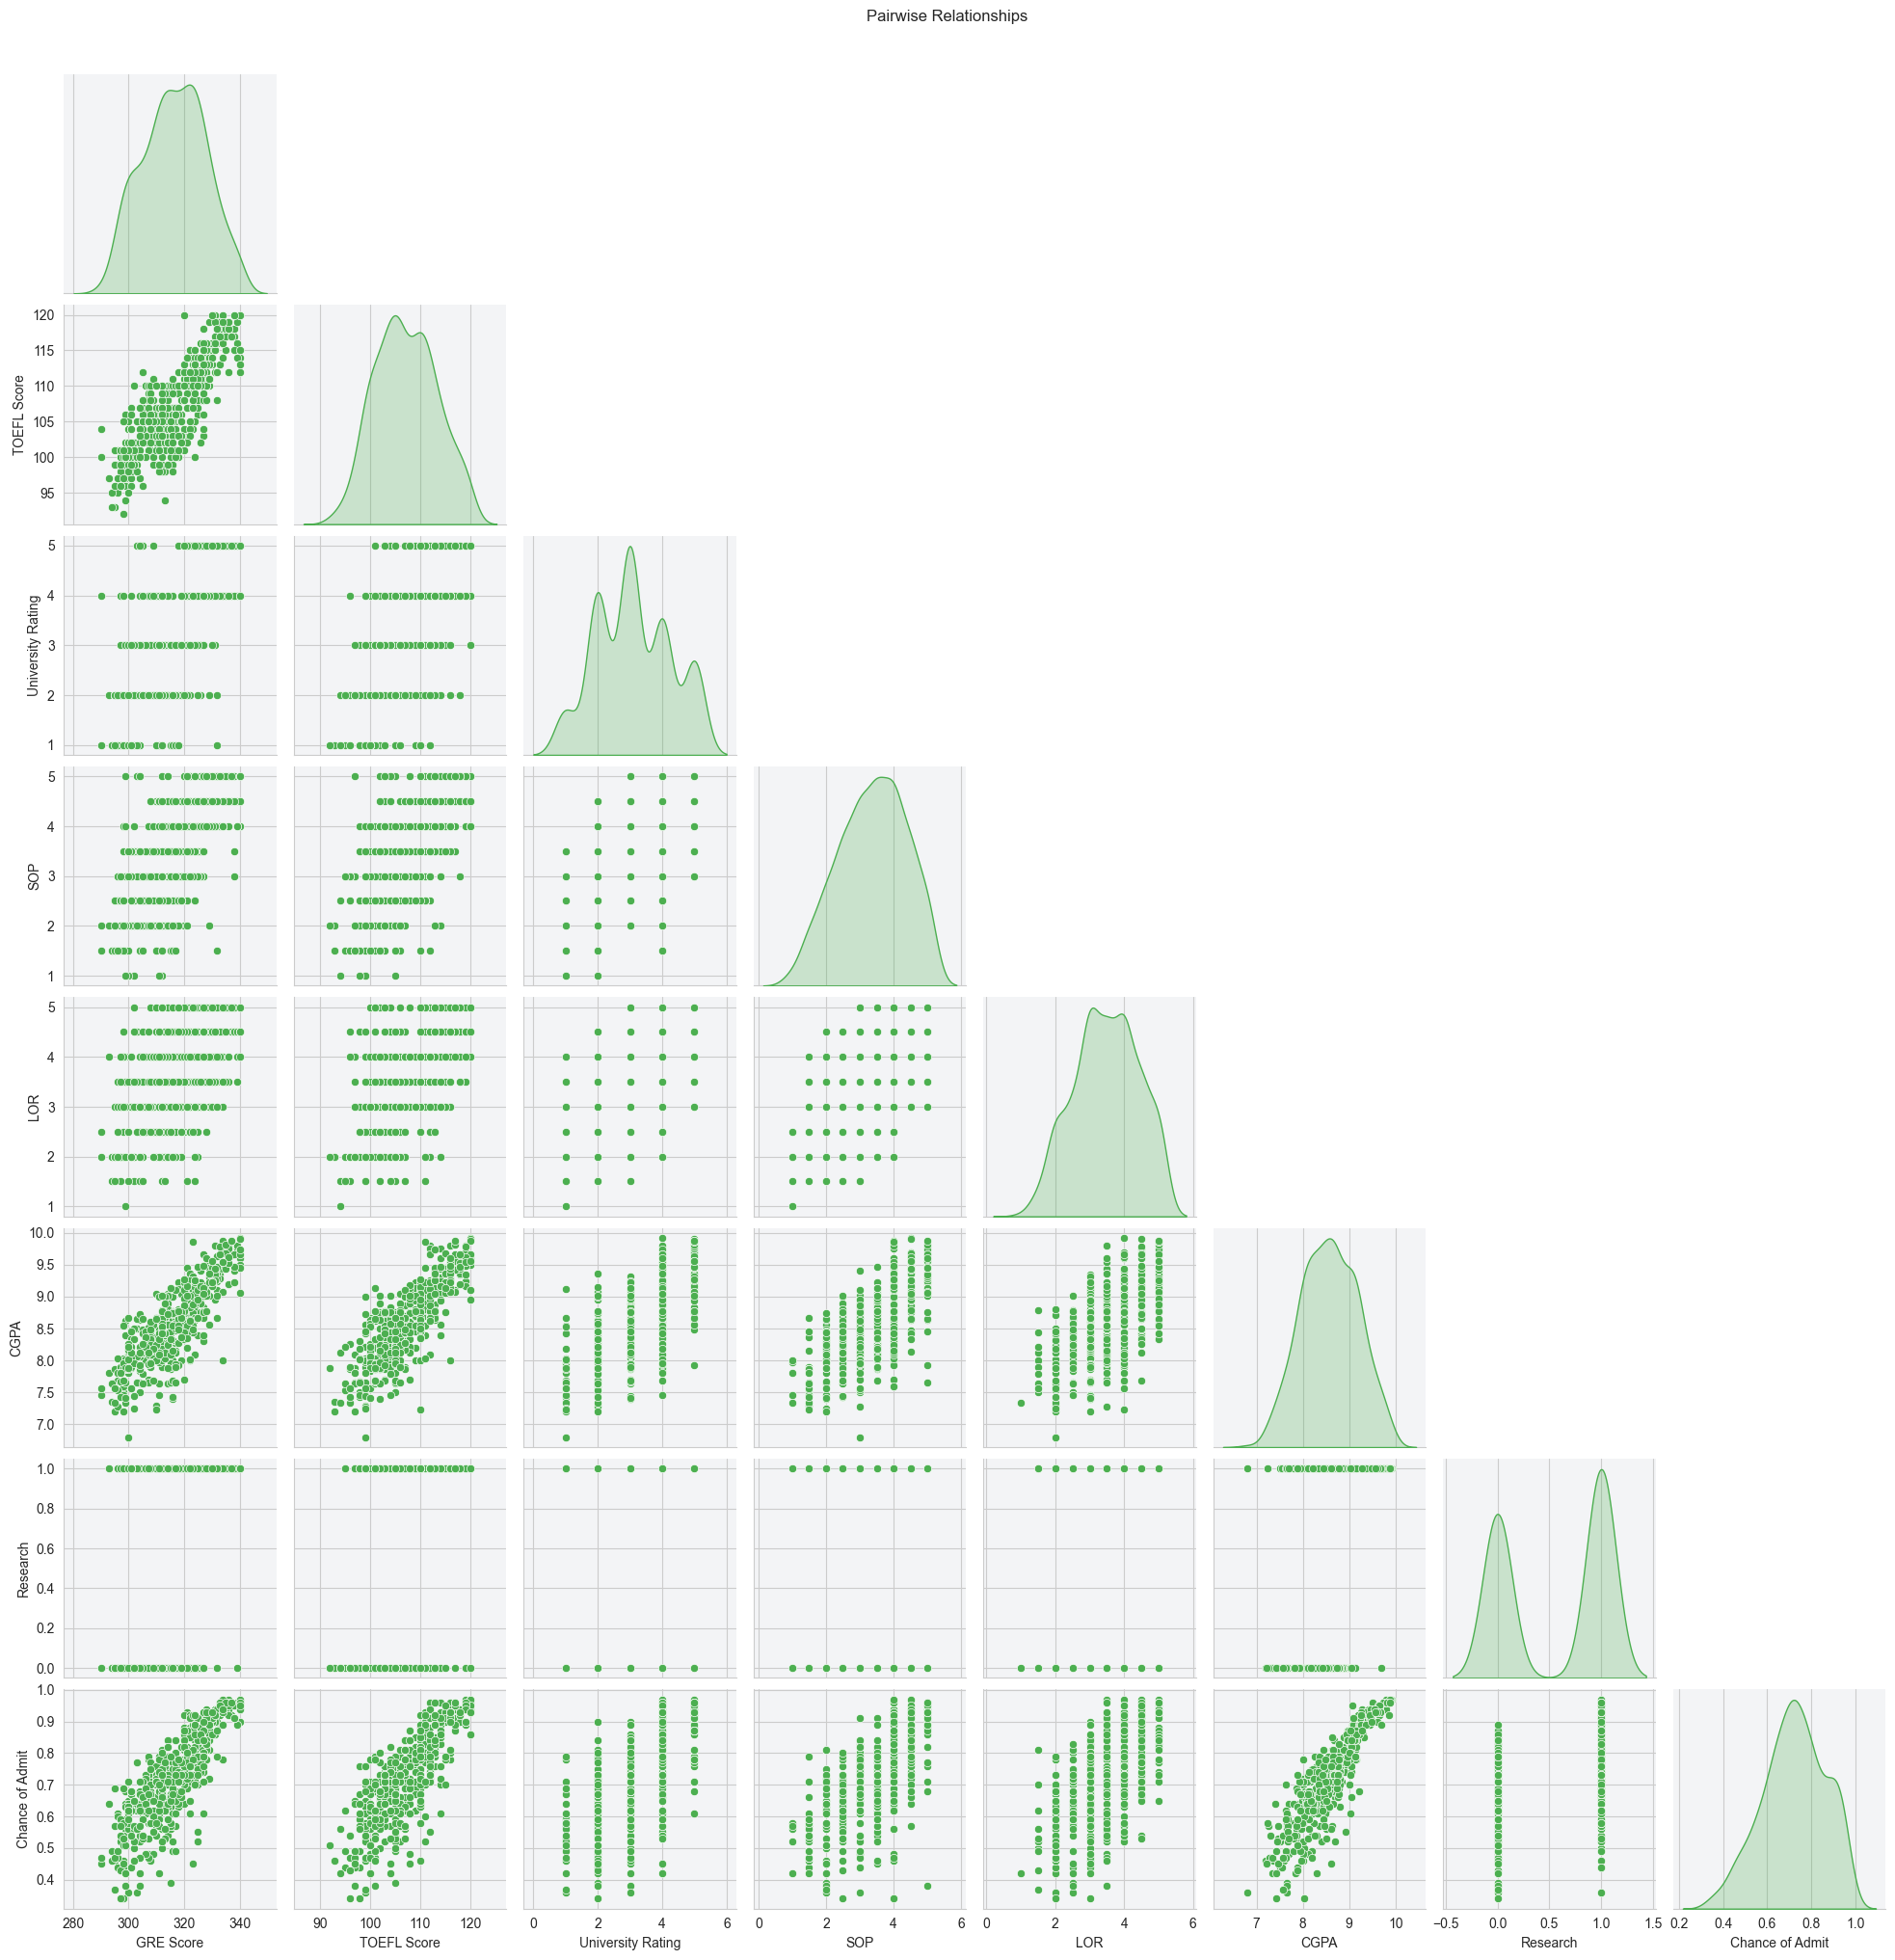

In [150]:
# Pairplot to visualize relationships
sns.pairplot(data, diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

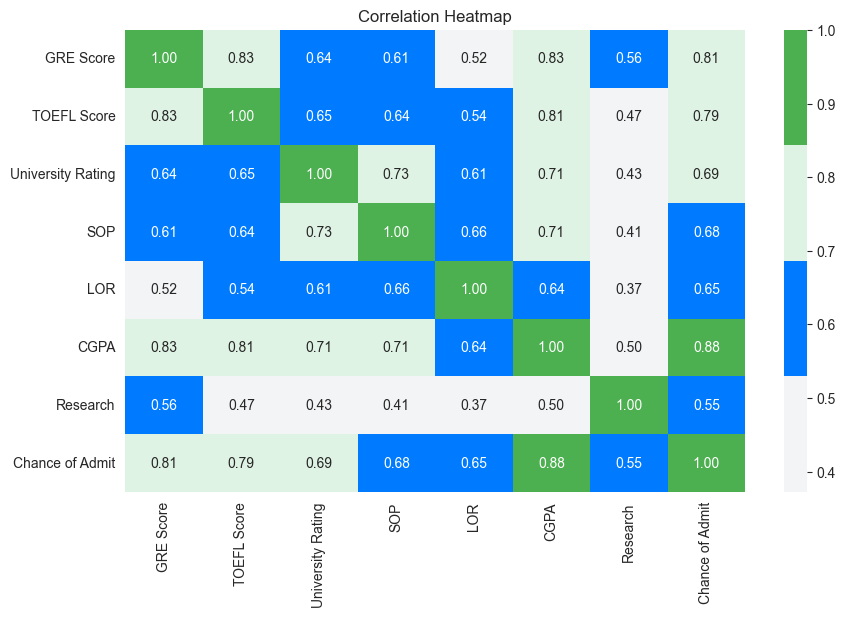

In [151]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap=jamboree_palette[::-1])
plt.title("Correlation Heatmap")
plt.show()

### **EDA Insights 🕵️‍♂️**

#### **Dataset Overview**  
- **Shape of Dataset:** (500, 9)  
- **Columns:** `Serial No.`, `GRE Score`, `TOEFL Score`, `University Rating`, `SOP`, `LOR`, `CGPA`, `Research`, `Chance of Admit`  
- **No Missing Values or Duplicates** ✅
- **No Outliers** ✅

---

#### **Statistical Summary of Continuous Variables 🧮**

| **Column**            | **Mean**   | **Min**   | **Max**   |
|------------------------|------------|-----------|-----------|
| **GRE Score**          | 316.47     | 290       | 340       |
| **TOEFL Score**        | 107.19     | 92        | 120       |
| **CGPA**               | 8.58       | 6.80      | 9.92      |
| **SOP**                | 3.37       | 1.00      | 5.00      |
| **LOR**                | 3.48       | 1.00      | 5.00      |
| **Chance of Admit**    | 0.72       | 0.34      | 0.97      |

---

#### **Distribution Insights 📊**  
- **Nearly Normal Distributions:**
  - `CGPA` is close to normal.  
  - `GRE Score` and `TOEFL Score` show slight deviations but are consistent.  
- **Skewness Observed:**  
  - `SOP` and `Chance of Admit` exhibit left-skewness.  
  - `Chance of Admit` shows bimodal characteristics.

---

#### **Categorical Variables 📋**  
- **University Rating (Counts):**  
  - `3 > 2 > 4 > 5 > 1`  
- **Research Experience:**  
  - Students **with research experience (56%)** slightly outnumber those without (44%).

---

#### **Correlation Analysis 🔗**
- **Strong Positive Relationships:**  
  - `CGPA` ↔ `Chance of Admit`  
  - `GRE Score` ↔ `TOEFL Score`  
- **No Negative Correlations at All:** All variables show either positive correlations or no correlation. 🌟  

---

#### **Key Takeaways 💡**
- Academic performance metrics (`CGPA`, `GRE Score`, `TOEFL Score`) have a **high linear relationship** with each other and strongly influence `Chance of Admit`.  
- Students with better CGPA tend to excel in GRE/TOEFL, increasing their chances of admission. 📈  
- Research experience is an additional advantage, with students having research experience slightly outnumbering those without.  

This analysis confirms that **students excelling academically (higher CGPA, GRE, TOEFL)** are more likely to get admitted, with no outlier variables negatively impacting outcomes. 🚀

### **Section 4: Modelling**  

In [152]:
# Section 4: Model Building 🔧
# Initial attempt: Vanilla Linear Regression, Ridge, and Lasso models
# Objective: To get an idea of model performance with minimal setup
# Metrics: MAE, RMSE, R², Adjusted R²

# Prepare features and target variable
X = data.drop('Chance of Admit',axis=1)
y = data['Chance of Admit']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Vanilla Linear Regression using Statsmodels
X_train_const = sm.add_constant(X_train)  # Adding constant for statsmodels
X_test_const = sm.add_constant(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled,columns=X_test.columns)

model_lr = sm.OLS(y_train, X_train_const).fit()
y_pred_lr = model_lr.predict(X_test_const)

# Metrics for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
adj_r2_lr = model_lr.rsquared_adj
print("Vanilla Model Performance Metrics:")
print("\nLinear Regression (Statsmodels):")
print(f"MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}, Adjusted R²: {adj_r2_lr:.4f}")

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, n_features):
    """
    Calculate MAE, RMSE, R², and Adjusted R² for a regression model.

    Parameters:
    - y_true: True target values
    - y_pred: Predicted target values
    - n_features: Number of features in the model

    Returns:
    - metrics_dict: Dictionary containing MAE, RMSE, R², and Adjusted R²
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * ((len(y_true) - 1) / (len(y_true) - n_features - 1))
    return {"MAE": mae, "RMSE": rmse, "R²": r2, "Adjusted R²": adj_r2}

# Ridge Regression
model_ridge = Ridge(random_state=42)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

ridge_metrics = calculate_metrics(y_test, y_pred_ridge, X_test.shape[1])
print(f"Ridge Regression Metrics: {ridge_metrics} ")

# Lasso Regression
model_lasso = Lasso(random_state=42)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

lasso_metrics = calculate_metrics(y_test, y_pred_lasso, X_test.shape[1])
print(f"Lasso Regression Metrics: {lasso_metrics}")

Vanilla Model Performance Metrics:

Linear Regression (Statsmodels):
MAE: 0.0427, RMSE: 0.0609, R²: 0.8188, Adjusted R²: 0.8179
Ridge Regression Metrics: {'MAE': 0.042747194746281504, 'RMSE': 0.060875071776539294, 'R²': 0.8187885396675398, 'Adjusted R²': 0.8050007111639831} 
Lasso Regression Metrics: {'MAE': 0.116268, 'RMSE': 0.1435208369018241, 'R²': -0.00724844132029312, 'Adjusted R²': -0.08388690968161971}


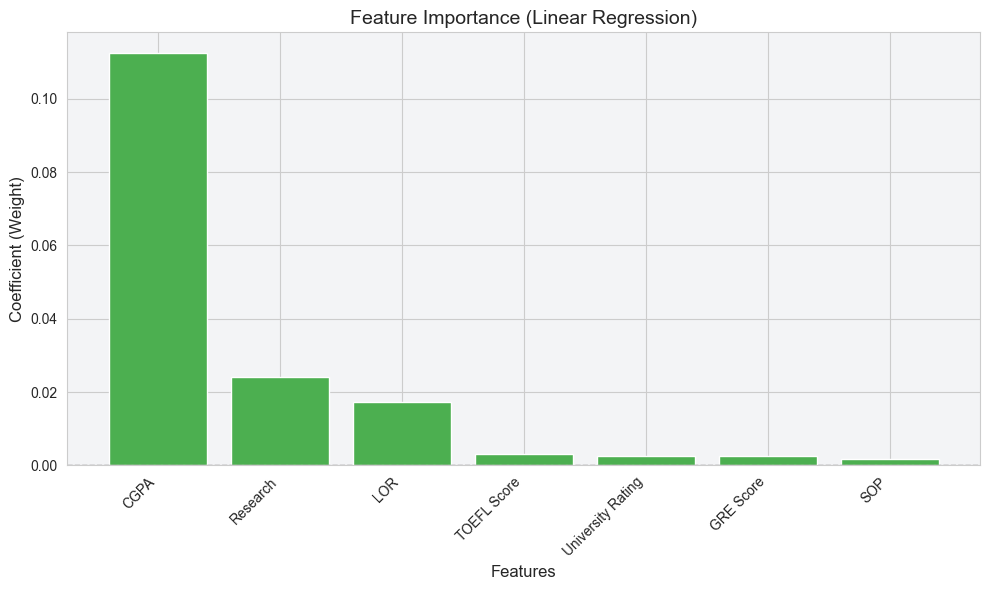

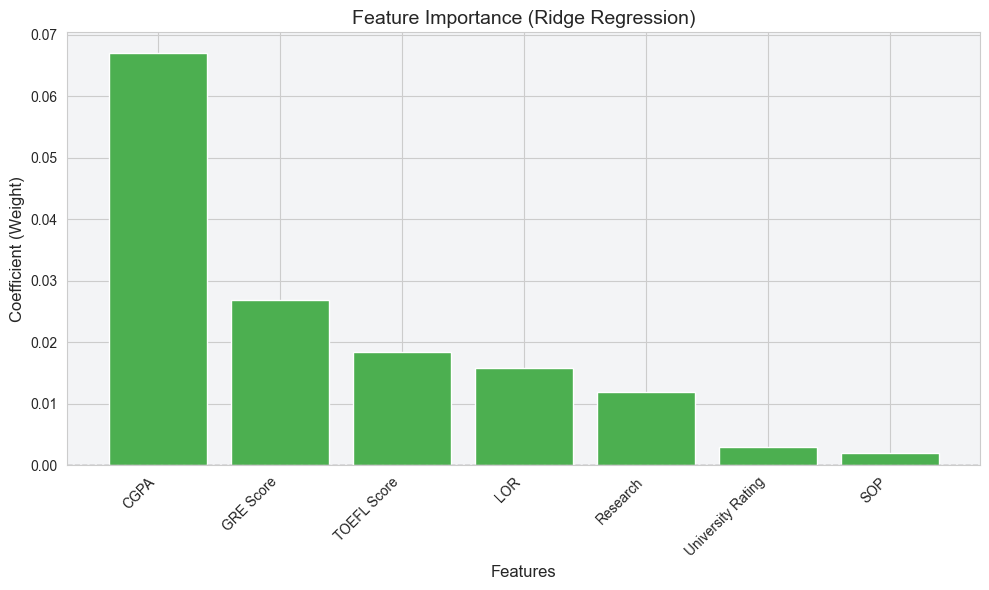

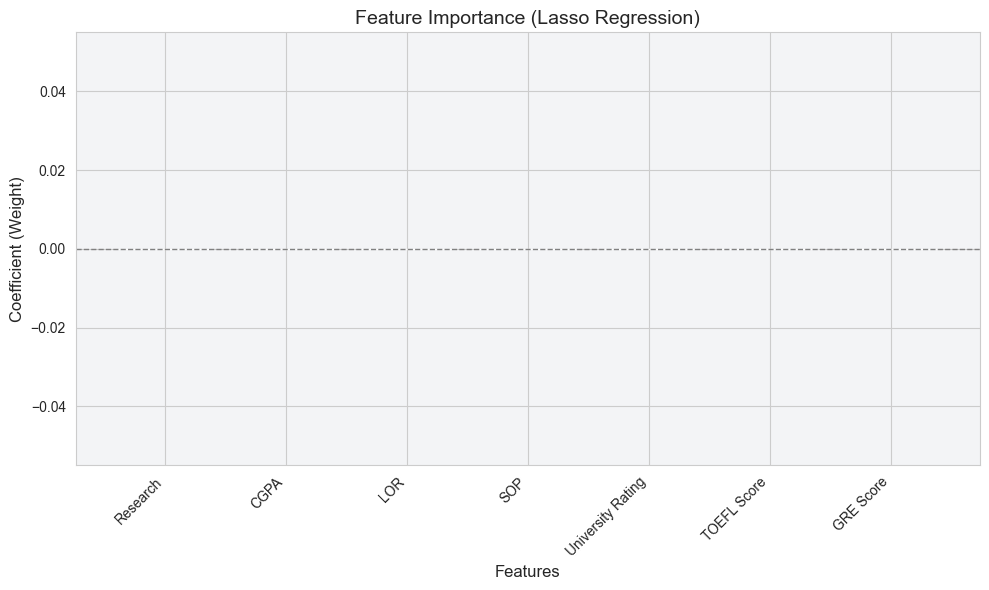

In [153]:
def plot_feature_importance(model, model_name, X_train, is_statsmodels=False):
    """
    Plots feature importance based on model coefficients.
    
    Parameters:
    - model: The trained model (Linear, Ridge, or Lasso).
    - model_name: Name of the model (e.g., 'Linear', 'Ridge', 'Lasso').
    - X_train: Training data to get feature names.
    - is_statsmodels: Set to True if the model is from statsmodels.
    """
    # Extract coefficients and feature names
    if is_statsmodels:
        coefficients = model.params.values[1:]  # Exclude constant
        feature_names = X_train.columns[1:]    # Exclude constant
    else:
        coefficients = model.coef_  # For Ridge and Lasso
        feature_names = X_train.columns

    # Sorting features by importance (absolute values)
    sorted_indices = np.argsort(np.abs(coefficients))[::-1]
    sorted_features = feature_names[sorted_indices]
    sorted_coefficients = coefficients[sorted_indices]
    
    # Plotting feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_features, sorted_coefficients, color=jamboree_palette[0])
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    plt.title(f'Feature Importance ({model_name} Regression)', fontsize=14)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Coefficient (Weight)', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

# Linear Regression (Statsmodels)
plot_feature_importance(model_lr, "Linear", X_train_const, is_statsmodels=True)

# Ridge Regression
plot_feature_importance(model_ridge, "Ridge", X_train)

# Lasso Regression
plot_feature_importance(model_lasso, "Lasso", X_train)

In [154]:
X = data.drop('Chance of Admit', axis=1)
y = data['Chance of Admit']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")

# Define the iterative function to remove features with VIF > 5
def vif_lt_5(X):
    cols = list(X.columns)
    while True:
        # Calculate VIF scores for the current set of columns
        vif_scores = pd.DataFrame({
            'Feature': cols,
            'VIF': [variance_inflation_factor(X[cols].values, i) for i in range(len(cols))]
        })
        print(vif_scores)
        
        # Check if all VIFs are below 5
        if vif_scores['VIF'].max() <= 5:
            print("All VIF values are below 5. Stopping iteration.")
            break
        
        # Remove the feature with the highest VIF
        highest_vif_feature = vif_scores.loc[vif_scores['VIF'].idxmax(), 'Feature']
        print(f"Removing feature with highest VIF: {highest_vif_feature}")
        cols.remove(highest_vif_feature)
    
    return cols

# Run the VIF reduction function
final_features = vif_lt_5(X)
print("Final Features with VIF < 5:", final_features)

R-squared Score: 0.7821
             Feature          VIF
0          GRE Score  1308.061089
1        TOEFL Score  1215.951898
2  University Rating    20.933361
3                SOP    35.265006
4                LOR    30.911476
5               CGPA   950.817985
6           Research     2.869493
Removing feature with highest VIF: GRE Score
             Feature         VIF
0        TOEFL Score  639.741892
1  University Rating   19.884298
2                SOP   33.733613
3                LOR   30.631503
4               CGPA  728.778312
5           Research    2.863301
Removing feature with highest VIF: CGPA
             Feature        VIF
0        TOEFL Score  22.035055
1  University Rating  19.747053
2                SOP  33.273087
3                LOR  29.531351
4           Research   2.849489
Removing feature with highest VIF: SOP
             Feature        VIF
0        TOEFL Score  19.844499
1  University Rating  14.952839
2                LOR  25.700130
3           Research   2.8244

In [155]:
# Residual mean for Linear Regression
residuals = y_test - y_pred

# Calculate the mean of residuals
mean_residuals = np.mean(residuals)
print(f"Mean of Residuals: {mean_residuals:.4f}")

# Check if the mean is close to zero
if np.abs(mean_residuals) < 1e-2:
    print("The mean of residuals is nearly zero.")
else:
    print("The mean of residuals is not close to zero.")

Mean of Residuals: 0.0043
The mean of residuals is nearly zero.


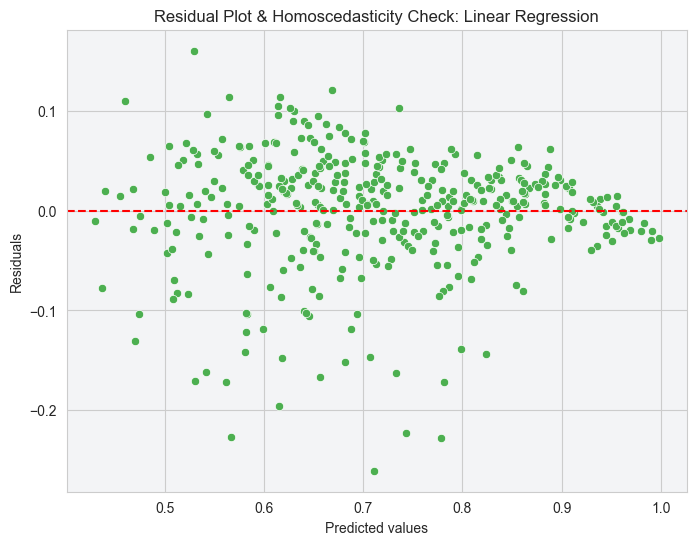

In [156]:
# Residual Plot and Homoscedasticity check

# Make predictions
y_pred = model.predict(X_train)

# Calculate residuals
residuals = y_train - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Red horizontal line at 0
plt.title('Residual Plot & Homoscedasticity Check: Linear Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

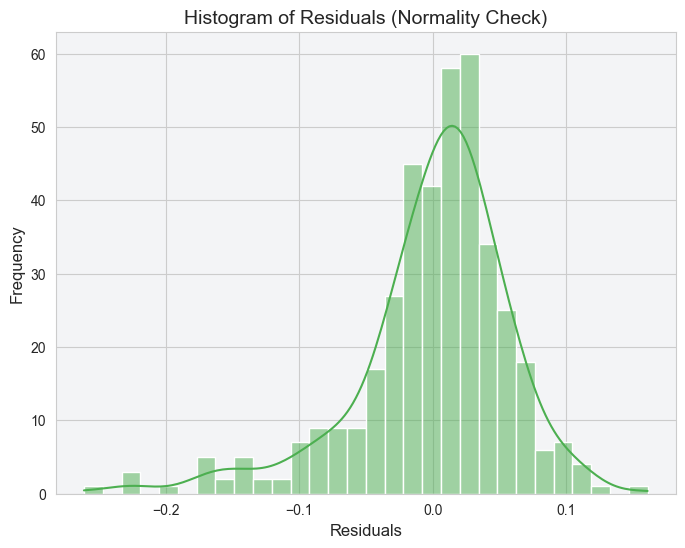

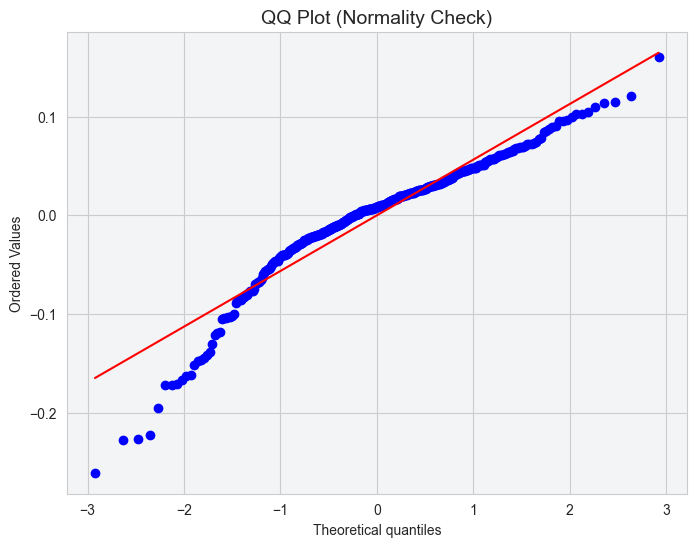

In [157]:
# Residual Distribution
# Plotting histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, palette=jamboree_palette)
plt.title('Histogram of Residuals (Normality Check)', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


# Create a QQ plot to check for normality
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot (Normality Check)', fontsize=14)
plt.show()

In [158]:
final_features

['TOEFL Score', 'Research']

In [159]:
# Select the relevant features and target
X = data[final_features]
y = data['Chance of Admit']

# Create and train the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the R² score (accuracy of the model)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Output the R² score
print(f"R² Score of the model: {r2:.4f}")

R² Score of the model: 0.7821


Last edited on 14-12-2024 12:44